In [ ]:
# install finrl library
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package swig4.0.
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubuntu1_all.deb ...
Unpacking swig (4.0.2-1ubuntu1) ...
Setting up libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Setting up swig4.0 (4.0.2-1ubuntu1) ...
Setting up swig (4.0.2-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-kutscirf
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-kutscirf
  Resolved https://github

In [ ]:
# 掛載雲端硬碟
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# 檢視雲端硬碟資料
!ls "/content/drive/My Drive/Colab Notebooks/PortfolioOptimizationWithESGInformationBasedOnDeepReinforcementLearning/ESGScore/"

ESG分數_.xlsx


In [ ]:
# 全域變數
googlepath = "drive/MyDrive/Colab Notebooks/PortfolioOptimizationWithESGInformationBasedOnDeepReinforcementLearning/ESGScore/"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# requirement
# Yahoo Finance API
# pandas
# numpy
# matplotlib
# stockstats
# OpenAI gym
# stable-baselines
# tensorflow
# pyfolio
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
# from finrl.config_tickers import SP_500_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.10/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)


In [ ]:
#建立資料夾
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
SP_500_ESGTOP20_TICKER = ["CL","CVS","MMM","MET","MSFT","CLX","TGT","NEM","CTRA","INCY","PEP","SLB","HAL","COP","HSY","C","BEN","GS","PPL","FMC"]

In [ ]:

TRAIN_START_DATE = '2013-01-01'
TRAIN_END_DATE = '2020-01-01'
TEST_START_DATE = '2020-01-01'
TEST_END_DATE = '2022-12-31'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = SP_500_ESGTOP20_TICKER).fetch_data()
df.to_csv('datasets_ESG.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day
0,2013-01-02,42.866669,43.326668,42.669998,29.066570,1933200,BEN,2
1,2013-01-02,40.910000,41.400002,40.700001,32.696720,45648500,C,2
2,2013-01-02,52.805000,53.154999,52.615002,41.178852,4150200,CL,2
3,2013-01-02,73.889999,74.089996,73.500000,54.646721,1110900,CLX,2
4,2013-01-02,59.150002,59.230000,58.509998,40.734753,6263400,COP,2


In [ ]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day
50355,2022-12-30,47.590000,47.599998,46.650002,45.364361,3921900,NEM,4
50356,2022-12-30,181.380005,181.960007,179.289993,175.618469,3136200,PEP,4
50357,2022-12-30,29.629999,29.660000,28.930000,28.161463,3812400,PPL,4
50358,2022-12-30,52.520000,53.549999,52.400002,52.447174,4629800,SLB,4
50359,2022-12-30,147.229996,149.080002,146.800003,144.369354,2391100,TGT,4


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(50360, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2013-01-02,42.866669,43.326668,42.669998,29.066570,1933200,BEN,2
1,2013-01-02,40.910000,41.400002,40.700001,32.696720,45648500,C,2
2,2013-01-02,52.805000,53.154999,52.615002,41.178852,4150200,CL,2
3,2013-01-02,73.889999,74.089996,73.500000,54.646721,1110900,CLX,2
4,2013-01-02,59.150002,59.230000,58.509998,40.734753,6263400,COP,2


In [ ]:
len(df.tic.unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20

In [ ]:
df.tic.value_counts()

BEN     2518
C       2518
SLB     2518
PPL     2518
PEP     2518
NEM     2518
MSFT    2518
MMM     2518
MET     2518
INCY    2518
HSY     2518
HAL     2518
GS      2518
FMC     2518
CVS     2518
CTRA    2518
COP     2518
CLX     2518
CL      2518
TGT     2518
Name: tic, dtype: int64

In [ ]:
 INDICATORS = ['macd',
               'rsi_30',
               'cci_30',
               'dx_30',
                 'close_30_sma', 'close_60_sma']  # 'boll_up', 'boll_dn',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#讀取ESG分數資料
df_ESG = pd.read_excel(f"{googlepath}ESG分數_.xlsx")

In [ ]:
#先檢視DataStructure，判斷如何進行後續資料處理
df_ESG

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,AMAZON.COM - ESG Score,ABBOTT LABORATORIES - ESG Score,AES - ESG Score,INTERNATIONAL BUS.MCHS. - ESG Score,ADVANCED MICRO DEVICES - ESG Score,ADOBE (NAS) - ESG Score,ALEXANDRIA RLST.EQTIES. - ESG Score,AIR PRDS.& CHEMS. - ESG Score,ALASKA AIR GROUP - ESG Score,...,WELLTOWER - ESG Score,HEWLETT PACKARD ENTER. - ESG Score,PAYPAL HOLDINGS - ESG Score,VICI PPTYS - ESG Score,HP - ESG Score,ALPHABET 'C' - ESG Score,WEC ENERGY GROUP - ESG Score,MONSTER BEVERAGE - ESG Score,SBA COMMS. - ESG Score,CHARTER COMMS.CL.A - ESG Score
0,2009-01-01,27.60,77.17,41.46,69.47,64.86,51.01,22.71,71.57,NaN,...,22.48,NaN,NaN,NaN,71.35,37.22,69.12,14.79,17.37,NaN
1,2009-01-02,27.60,77.17,41.46,69.47,64.86,51.01,22.71,71.57,NaN,...,22.48,NaN,NaN,NaN,71.35,37.22,69.12,14.79,17.37,NaN
2,2009-01-05,27.60,77.17,41.46,69.47,64.86,51.01,22.71,71.57,NaN,...,22.48,NaN,NaN,NaN,71.35,37.22,69.12,14.79,17.37,NaN
3,2009-01-06,27.60,77.17,41.46,69.47,64.86,51.01,22.71,71.57,NaN,...,22.48,NaN,NaN,NaN,71.35,37.22,69.12,14.79,17.37,NaN
4,2009-01-07,27.60,77.17,41.46,69.47,64.86,51.01,22.71,71.57,NaN,...,22.48,NaN,NaN,NaN,71.35,37.22,69.12,14.79,17.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2022-12-26,75.65,81.77,NaN,73.86,66.79,NaN,74.71,NaN,56.81,...,NaN,NaN,79.87,NaN,NaN,81.14,NaN,NaN,NaN,38.55
3648,2022-12-27,75.65,81.77,NaN,73.86,66.79,NaN,74.71,NaN,56.81,...,NaN,NaN,79.87,NaN,NaN,81.14,NaN,NaN,NaN,38.55
3649,2022-12-28,75.65,81.77,NaN,73.86,66.79,NaN,74.71,NaN,56.81,...,NaN,NaN,79.87,NaN,NaN,81.14,NaN,NaN,NaN,38.55
3650,2022-12-29,75.65,81.77,NaN,73.86,66.79,NaN,74.71,NaN,56.81,...,NaN,NaN,79.87,NaN,NaN,81.14,NaN,NaN,NaN,38.55


In [ ]:
df_ESG.describe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.describe of            Name  AMAZON.COM - ESG Score  ABBOTT LABORATORIES - ESG Score  \
0    2009-01-01                   27.60                            77.17   
1    2009-01-02                   27.60                            77.17   
2    2009-01-05                   27.60                            77.17   
3    2009-01-06                   27.60                            77.17   
4    2009-01-07                   27.60                            77.17   
...         ...                     ...                              ...   
3647 2022-12-26                   75.65                            81.77   
3648 2022-12-27                   75.65                            81.77   
3649 2022-12-28                   75.65                            81.77   
3650 2022-12-29                   75.65                            81.77   
3651 2022-12-30                   75.65                            81.77   

      AES - ESG Score  INTERNATIONAL BUS.MCHS. - ESG 

In [ ]:
df_ESG.columns.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Name',
 'AMAZON.COM - ESG Score',
 'ABBOTT LABORATORIES - ESG Score',
 'AES - ESG Score',
 'INTERNATIONAL BUS.MCHS. - ESG Score',
 'ADVANCED MICRO DEVICES - ESG Score',
 'ADOBE (NAS) - ESG Score',
 'ALEXANDRIA RLST.EQTIES. - ESG Score',
 'AIR PRDS.& CHEMS. - ESG Score',
 'ALASKA AIR GROUP - ESG Score',
 'BOSTON PROPERTIES - ESG Score',
 'ALLSTATE ORD SHS - ESG Score',
 'HONEYWELL INTL. - ESG Score',
 'AMGEN - ESG Score',
 'HESS - ESG Score',
 'AMERICAN EXPRESS - ESG Score',
 'AMER.ELEC.PWR. - ESG Score',
 'AFLAC - ESG Score',
 'AMERICAN INTL.GP. - ESG Score',
 'ANALOG DEVICES - ESG Score',
 'VALERO ENERGY - ESG Score',
 'COMCAST A - ESG Score',
 'ANSYS - ESG Score',
 'APPLE - ESG Score',
 'APPLIED MATS. - ESG Score',
 'ALBEMARLE - ESG Score',
 'ARCHER DANIELS MIDLAND - ESG Score',
 'PINNACLE WEST CAP. - ESG Score',
 'AMEREN - ESG Score',
 'AUTODESK - ESG Score',
 'AUTOMATIC DATA PROC. - ESG Score',
 'AUTOZONE - ESG Score',
 'AVERY DENNISON - ESG Score',
 'BALL - ESG Score',
 "BERKSHI

In [ ]:
initList = ['Name']
stockList =['AMAZON.COM',
  'ABBOTT LABORATORIES',
  'AES',
  'INTERNATIONAL BUS.MCHS.',
  'ADVANCED MICRO DEVICES',
  'ADOBE (NAS)',
  'ALEXANDRIA RLST.EQTIES.',
  'AIR PRDS.& CHEMS.',
  'ALASKA AIR GROUP',
  'BOSTON PROPERTIES',
  'ALLSTATE ORD SHS',
  'HONEYWELL INTL.',
  'AMGEN',
  'HESS',
  'AMERICAN EXPRESS',
  'AMER.ELEC.PWR.',
  'AFLAC',
  'AMERICAN INTL.GP.',
  'ANALOG DEVICES',
  'VALERO ENERGY',
  'COMCAST A',
  'ANSYS',
  'APPLE',
  'APPLIED MATS.',
  'ALBEMARLE',
  'ARCHER DANIELS MIDLAND',
  'PINNACLE WEST CAP.',
  'AMEREN',
  'AUTODESK',
  'AUTOMATIC DATA PROC.',
  'AUTOZONE',
  'AVERY DENNISON',
  'BALL',
  "BERKSHIRE HATHAWAY 'B'",
  'BAXTER INTL.',
  'BECTON DICKINSON',
  'AMETEK',
  'VERIZON COMMUNICATIONS',
  'W R BERKLEY',
  'BEST BUY',
  "BIO-RAD LABORATORIES 'A'",
  'YUM! BRANDS',
  'FIRSTENERGY',
  'BOEING',
  'ROBERT HALF',
  'BORGWARNER',
  'BOSTON SCIENTIFIC',
  'CH ROBINSON WWD.',
  'TAKE TWO INTACT.SFTW.',
  'METTLER TOLEDO INTL.',
  'BRISTOL MYERS SQUIBB',
  'ONEOK',
  'AVALONBAY COMMNS.',
  'UNITED RENTALS',
  'SEMPRA',
  'FEDEX',
  'VERISIGN',
  "AMPHENOL 'A'",
  "BROWN-FORMAN 'B'",
  'QUANTA SERVICES',
  'CSX',
  'COTERRA ENERGY',
  'CAMPBELL SOUP',
  'CAMDEN PROPERTY TST.',
  "CONSTELLATION BRANDS 'A'",
  'CARDINAL HEALTH',
  'CATERPILLAR',
  'JP MORGAN CHASE & CO.',
  'CHURCH & DWIGHT CO.',
  'CINCINNATI FINL.',
  'CINTAS',
  'CISCO SYSTEMS',
  'CLOROX',
  'COCA COLA',
  'COPART',
  'COLGATE-PALM.',
  "MARRIOTT INTL.'A'",
  'MOLINA HEALTHCARE',
  'COMERICA',
  'NRG ENERGY',
  'CONAGRA BRANDS',
  'CONSOLIDATED EDISON',
  'CMS ENERGY',
  'COOPER COS.',
  'CORNING',
  'SEALED AIR',
  'CUMMINS',
  'D R HORTON',
  'DANAHER',
  "MOODY'S",
  "COGNIZANT TECH.SLTN.'A'",
  'TARGET',
  'DEERE',
  'MORGAN STANLEY',
  "REPUBLIC SVS.'A'",
  'COSTAR GP.',
  'WALT DISNEY',
  'DOLLAR TREE',
  'DOVER',
  'OMNICOM GROUP',
  'DTE ENERGY',
  'DARDEN RESTAURANTS',
  'EBAY',
  'BANK OF AMERICA',
  'CITIGROUP',
  'EASTMAN CHEMICAL',
  'CADENCE DESIGN SYS.',
  'ECOLAB',
  'REVVITY',
  'ELECTRONIC ARTS',
  'SALESFORCE',
  'EMERSON ELECTRIC',
  'ATMOS ENERGY',
  'ESSEX PROPERTY TST.',
  'ENTERGY',
  'EOG RES.',
  'EQUIFAX',
  'EQUITY RESD.TST.PROPS. SHBI',
  'EQT',
  "ESTEE LAUDER COS.'A'",
  'EXPEDITORS INTL.OF WASH.',
  'EXXON MOBIL',
  'FMC',
  'NEXTERA ENERGY',
  'FACTSET RESEARCH SYS.',
  'FAIR ISAAC',
  'ASSURANT',
  'FASTENAL',
  'FIFTH THIRD BANCORP',
  'M&T BANK',
  'FISERV',
  'FRANKLIN RESOURCES',
  'FREEPORT-MCMORAN',
  'ARTHUR J GALLAGHER',
  'GENERAL DYNAMICS',
  'GENERAL MILLS',
  'GENUINE PARTS',
  'GILEAD SCIENCES',
  "GARTNER 'A'",
  'MCKESSON',
  'NVIDIA',
  'WW GRAINGER',
  'HALLIBURTON',
  'GOLDMAN SACHS GP.',
  'HASBRO',
  'HENRY SCHEIN',
  'HERSHEY',
  'F5',
  'JUNIPER NETWORKS',
  'HOLOGIC',
  'HOME DEPOT',
  'HORMEL FOODS',
  'CENTERPOINT EN.',
  'HUMANA',
  'HUNT JB TRANSPORT SVS.',
  'HUNTINGTON BCSH.',
  'BIOGEN',
  'IDEX',
  'ILLINOIS TOOL WORKS',
  'INTUIT',
  'IDEXX LABORATORIES',
  'INTEL',
  'INTL.FLAVORS & FRAG.',
  'INTERNATIONAL PAPER',
  'INTERPUBLIC GROUP',
  'JACK HENRY AND ASSOCIATES',
  'INCYTE',
  'JOHNSON & JOHNSON',
  'HARTFORD FINL.SVS.GP.',
  'KLA',
  'DEVON ENERGY',
  'KELLANOVA',
  'KEYCORP',
  'KIMCO REALTY',
  'KIMBERLY-CLARK',
  'BLACKROCK',
  'KROGER',
  'LAM RESEARCH',
  'TELEDYNE TECHS.',
  'PACKAGING CORP.OF AM.',
  'AKAMAI TECHS.',
  "LENNAR 'A'",
  'ELI LILLY',
  "UNITED PARCEL SER.'B'",
  'AGILENT TECHS.',
  'LOCKHEED MARTIN',
  'LOEWS',
  'CARNIVAL',
  "LOWE'S COMPANIES",
  'DOMINION ENERGY',
  'MGM RESORTS INTL.',
  'MCCORMICK & COMPANY NV.',
  'MCDONALDS',
  'EVEREST GROUP',
  'EDWARDS LIFESCIENCES',
  'HOST HOTELS & RESORTS REIT',
  'MARSH & MCLENNAN',
  'MASCO',
  'MARTIN MRTA.MATS.',
  'METLIFE',
  'CVS HEALTH',
  'ON SEMICONDUCTOR',
  'LABORATORY CORP.OF AM. HDG.',
  'MICROSOFT',
  'MICRON TECHNOLOGY',
  'MID-AMER.APT COMMUNITIES',
  'MICROCHIP TECH.',
  '3M',
  'MOHAWK INDUSTRIES',
  'CHAS.RVR.LABS.INTL.',
  'ILLUMINA',
  'XCEL ENERGY',
  'FORD MOTOR',
  'NETAPP',
  'NEWMONT',
  'NVR',
  "NIKE 'B'",
  'NORDSON',
  'NORFOLK SOUTHERN',
  'NISOURCE',
  'NORTHERN TRUST',
  'NORTHROP GRUMMAN',
  'WELLS FARGO & CO',
  'NUCOR',
  'CAPITAL ONE FINL.',
  'OCCIDENTAL PTL.',
  'OLD DOMINION FGT.LINES',
  'ORACLE',
  'PACCAR',
  'EXELON',
  'PARKER-HANNIFIN',
  'PAYCHEX',
  'ALIGN TECHNOLOGY',
  'PPL',
  'PEPSICO',
  'PFIZER',
  'CONOCOPHILLIPS',
  'PG&E',
  'PIONEER NTRL.RES.',
  'ALTRIA GROUP',
  'PNC FINL.SVS.GP.',
  'BROWN & BROWN',
  'PPG INDUSTRIES',
  'COSTCO WHOLESALE',
  'T ROWE PRICE GROUP',
  'QUEST DIAGNOSTICS',
  'PROCTER & GAMBLE',
  'PROGRESSIVE OHIO',
  'PUB.SER.ENTER.GP.',
  'PULTEGROUP',
  'GLOBAL PAYMENTS',
  'QUALCOMM',
  'RAYMOND JAMES FINL.',
  'REALTY INCOME',
  'REGENCY CENTERS',
  'UDR',
  'REGENERON PHARMS.',
  'RESMED',
  'US BANCORP',
  'ARCH CAP.GP.',
  'ROSS STORES',
  'ROLLINS',
  'ROPER TECHNOLOGIES',
  'ROCKWELL AUTOMATION',
  'ROYAL CARIBBEAN GROUP',
  'TRAVELERS COS.',
  'FIDELITY NAT.INFO.SVS.',
  'MERCK & COMPANY',
  'SCHLUMBERGER',
  'CHARLES SCHWAB',
  'POOL',
  'ZIMMER BIOMET HDG.',
  'CENCORA',
  'PRINCIPAL FINL.GP.',
  'SHERWIN-WILLIAMS',
  'CENTENE',
  'SIMON PROPERTY GROUP',
  'SMITH (AO)',
  'SNAP-ON',
  'PRUDENTIAL FINL.',
  'EDISON INTL.',
  'SOUTHERN',
  'SOUTHWEST AIRLINES',
  'AT&T',
  'CHEVRON',
  'STATE STREET',
  'STARBUCKS',
  'STEEL DYNAMICS',
  'PUBLIC STORAGE',
  'STRYKER',
  'NETFLIX',
  'SYNOPSYS',
  'SYSCO',
  'INTUITIVE SURGICAL',
  'TELEFLEX',
  'TERADYNE (XSC)',
  'TEXAS INSTRUMENTS',
  'TEXTRON',
  'THERMO FISHER SCIENTIFIC',
  'DAVITA',
  'TRACTOR SUPPLY',
  'TRIMBLE',
  'TYLER TECHNOLOGIES',
  "TYSON FOODS 'A'",
  'MARATHON OIL',
  'UNION PACIFIC',
  'UNITEDHEALTH GROUP',
  "UNIVERSAL HEALTH SVS.'B'",
  'VENTAS',
  'V F',
  'VERTEX PHARMS.',
  'VULCAN MATERIALS',
  'WALMART',
  'WASTE MANAGEMENT',
  'WATERS',
  'WEST PHARM.SVS.',
  'J M SMUCKER',
  'WESTERN DIGITAL',
  'WABTEC',
  'WEYERHAEUSER',
  'WHIRLPOOL',
  'SKYWORKS SOLUTIONS',
  'WYNN RESORTS',
  'NASDAQ',
  'CME GROUP',
  'WILLIAMS',
  'LKQ',
  'ALLIANT ENERGY (XSC)',
  'CARMAX',
  'TJX',
  "ZEBRA TECHNOLOGIES 'A'",
  'ZIONS BANCORP.',
  'REGIONS FINL.NEW',
  "DOMINO'S PIZZA",
  'MONOLITHIC PWR.SYS.',
  'EXTRA SPACE STRG.',
  'LAS VEGAS SANDS',
  'DIGITAL REALTY TST.',
  'MARKETAXESS HOLDINGS',
  'CELANESE',
  'MOLSON COORS BEVERAGE COMPANY B',
  'DEXCOM',
  'CF INDUSTRIES HDG.',
  'AMERIPRISE FINL.',
  'LIVE NATION ENTM.',
  'CHIPOTLE MEXN.GRILL',
  'TRANSDIGM GROUP',
  'MASTERCARD',
  'FIRST SOLAR',
  'BROADRIDGE FINL.SLTN.',
  'DELTA AIR LINES',
  'INSULET',
  'DISCOVER FINANCIAL SVS.',
  'BANK OF NEW YORK MELLON',
  'LULULEMON ATHLETICA',
  'ULTA BEAUTY',
  'INVESCO',
  'MSCI',
  'PHILIP MORRIS INTL.',
  "VISA 'A'",
  'AMERICAN WATER WORKS',
  'CHUBB',
  'MARATHON PETROLEUM',
  'MOSAIC',
  'KINDER MORGAN',
  'XYLEM',
  'STANLEY BLACK & DECKER',
  'LYONDELLBASELL INDS.CL.A',
  'GARMIN',
  'HNTGTN.INGALLS INDS.',
  'PROLOGIS REIT',
  'EPAM SYSTEMS',
  'ACCENTURE CLASS A',
  'HCA HEALTHCARE',
  'VERISK ANALYTICS CL.A',
  'UNITED AIRLINES HOLDINGS',
  'FLEETCOR TECHNOLOGIES',
  'RALPH LAUREN CL.A',
  'NXP SEMICONDUCTORS',
  'TARGA RESOURCES',
  'CBOE GLOBAL MARKETS(BTS)',
  'DOLLAR GENERAL',
  'FORTINET',
  'MOTOROLA SOLUTIONS',
  'TESLA',
  'GENERAC HOLDINGS',
  'TE CONNECTIVITY',
  'O REILLY AUTOMOTIVE',
  'ENPHASE ENERGY',
  'GENERAL MOTORS',
  'CBRE GROUP CLASS A',
  'EXPEDIA GROUP',
  'APTIV',
  'PHILLIPS 66',
  'AMERICAN TOWER',
  'META PLATFORMS A',
  'DUKE ENERGY',
  'DIAMONDBACK ENERGY',
  'SERVICENOW',
  'PALO ALTO NETWORKS',
  'MONDELEZ INTERNATIONAL CL.A',
  'EATON',
  'ABBVIE',
  'T-MOBILE US',
  'PTC',
  'ZOETIS A',
  'NORWEGIAN CRUISE LINE HDG.',
  "NEWS 'A'",
  "NEWS 'B'",
  'CDW',
  'AMERICAN AIRLINES GROUP',
  'KEURIG DR PEPPER',
  'INVITATION HOMES',
  'WILLIS TOWERS WATSON',
  'HUBBELL',
  'BAKER HUGHES A',
  'LAMB WESTON HOLDINGS',
  'IQVIA HOLDINGS',
  'BOOKING HOLDINGS',
  'AXON ENTERPRISE',
  'LEIDOS HOLDINGS',
  'BROADCOM',
  'TAPESTRY',
  'EVERGY',
  'ALLEGION',
  'INTERCONTINENTAL EX.',
  'CERIDIAN HCM HOLDING',
  'STERIS',
  'MODERNA',
  'CIGNA',
  'DOW ORD SHS',
  'AMCOR',
  'HEALTHPEAK PROPERTIES',
  'FOX A',
  'FOX B',
  'GEN DIGITAL',
  'DUPONT DE NEMOURS',
  'CARRIER GLOBAL',
  'OTIS WORLDWIDE',
  'GLOBE LIFE',
  'CORTEVA',
  'MATCH GROUP',
  'L3HARRIS TECHNOLOGIES',
  'TRANE TECHNOLOGIES',
  'BLACKSTONE',
  'HOWMET AEROSPACE',
  'TRUIST FINANCIAL',
  'PARAMOUNT GLOBAL B',
  'SEAGATE TECHNOLOGY HOLDINGS',
  'GENERAL ELECTRIC',
  'INGERSOLL RAND',
  'GE HEALTHCARE TECHNOLOGIES',
  'PAYCOM SOFTWARE',
  'AON CLASS A',
  'PENTAIR',
  'RTX',
  'WARNER BROS DISCOVERY SERIES A',
  'AIRBNB A',
  'CONSTELLATION ENERGY',
  'VIATRIS',
  'CAESARS ENTERTAINMENT',
  'ARISTA NETWORKS',
  'FEDERAL REALTY INV.TST.',
  'JACOBS SOLUTIONS',
  'APA',
  'BATH AND BODY WORKS',
  'LINDE (NYS)',
  'CATALENT',
  'SYNCHRONY FINANCIAL',
  '#ERROR',
  'BUNGE GLOBAL',
  '#ERROR.1',
  'CITIZENS FINANCIAL GROUP',
  'KEYSIGHT TECHNOLOGIES',
  'QORVO',
  'BIO-TECHNE',
  'ELEVANCE HEALTH',
  'CROWN CASTLE',
  'MEDTRONIC',
  'WALGREENS BOOTS ALLIANCE',
  'IRON MOUNTAIN',
  'EQUINIX REIT',
  'EVERSOURCE ENERGY',
  'SOLAREDGE TECHNOLOGIES',
  'ETSY',
  'JOHNSON CONTROLS INTL.',
  'DENTSPLY SIRONA',
  'WESTROCK',
  'KRAFT HEINZ',
  'FORTIVE',
  'S&P GLOBAL',
  'HILTON WORLDWIDE HDG.',
  'ALPHABET A',
  'WELLTOWER',
  'HEWLETT PACKARD ENTER.',
  'PAYPAL HOLDINGS',
  'VICI PPTYS',
  'HP',
  "ALPHABET 'C'",
  'WEC ENERGY GROUP',
  'MONSTER BEVERAGE',
  'SBA COMMS.',
  'CHARTER COMMS.CL.A']

In [ ]:
#根據資料集資料結構，考量後續資料處理所需，建立TransformDF處理DF
def TransformDF(df,column_name):
  #將欄位名稱精簡為股票名稱
  df.columns = initList + stockList
  #+-----+-----+-----+-------+
  #| A |col_1|col_2|col_...|
  #+-----+-------------------+
  #| 1 | 0.0| 0.6| ... |
  #| 2 | 0.6| 0.7| ... |
  #| 3 | 0.5| 0.9| ... |
  #| ...| ...| ...| ... |
  #要變成
  #+-----+--------+-----------+
  #| A |col_id |col_value |
  #+-----+--------+-----------+
  #| 1 |  col_1|    0.0|
  #| 1 |  col_2|    0.6|
  #| ...|   ...|    ...|
  #| 2 |  col_1|    0.6|
  #| 2 |  col_2|    0.7|
  #| ...|   ...|    ...|
  #| 3 |  col_1|    0.5|
  #| 3 |  col_2|    0.9|
  #| ...|   ...|    ...|
  #https://stackoverflow.com/questions/37864222/transpose-column-to-row-with-spark
  #可用melt method
  #df.melt(
  #    ids=["A"], values=["col_1", "col_2"],
  #    variableColumnName="key", valueColumnName="val"
  #)
  #另參考pandas官方文檔
  #https://pandas.pydata.org/docs/reference/api/pandas.melt.html
  return pd.melt(df,
    id_vars=["Name"], value_vars=stockList,
      var_name="StockName", value_name=column_name
  )

In [ ]:
df_ESG_After = TransformDF(df_ESG,"ESG")

In [ ]:
df_ESG_After = df_ESG_After.rename(columns={"Name":"date","StockName": "StockName", "ESG": "ESG"})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ESG_After

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,StockName,ESG
0,2009-01-01,AMAZON.COM,27.6
1,2009-01-02,AMAZON.COM,27.6
2,2009-01-05,AMAZON.COM,27.6
3,2009-01-06,AMAZON.COM,27.6
4,2009-01-07,AMAZON.COM,27.6
...,...,...,...
1836951,2022-12-26,CHARTER COMMS.CL.A,38.55
1836952,2022-12-27,CHARTER COMMS.CL.A,38.55
1836953,2022-12-28,CHARTER COMMS.CL.A,38.55
1836954,2022-12-29,CHARTER COMMS.CL.A,38.55


In [ ]:
SP_500_ESGTOP20_TICKER_Dict = {"COLGATE-PALM.":"CL","CVS HEALTH":"CVS","3M":"MMM","METLIFE":"MET","MICROSOFT":"MSFT","CLOROX":"CLX","TARGET":"TGT","NEWMONT":"NEM","COTERRA ENERGY":"CTRA","INCYTE":"INCY","PEPSICO":"PEP","SCHLUMBERGER":"SLB","HALLIBURTON":"HAL","CONOCOPHILLIPS":"COP","HERSHEY":"HSY","CITIGROUP":"C","FRANKLIN RESOURCES":"BEN","GOLDMAN SACHS":"GS","PPL":"PPL","FMC":"FMC"}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ESG_After['tic'] = df_ESG_After['StockName'].map(SP_500_ESGTOP20_TICKER_Dict)

In [ ]:
df_ESG_After = df_ESG_After[df_ESG_After['tic'].isin(SP_500_ESGTOP20_TICKER)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ESG_After

,date,StockName,ESG,tic
222772,2009-01-01,COTERRA ENERGY,10.53,CTRA
222773,2009-01-02,COTERRA ENERGY,10.53,CTRA
222774,2009-01-05,COTERRA ENERGY,10.53,CTRA
222775,2009-01-06,COTERRA ENERGY,10.53,CTRA
222776,2009-01-07,COTERRA ENERGY,10.53,CTRA
...,...,...,...,...
982383,2022-12-26,SCHLUMBERGER,86.05,SLB
982384,2022-12-27,SCHLUMBERGER,86.05,SLB
982385,2022-12-28,SCHLUMBERGER,86.05,SLB
982386,2022-12-29,SCHLUMBERGER,86.05,SLB


In [ ]:
df_ESG_After = df_ESG_After.drop(columns=['StockName'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_ESG_After['date'] = df_ESG_After['date'].astype('datetime64[ns]')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day
0,2013-01-02,42.866669,43.326668,42.669998,29.066570,1933200,BEN,2
1,2013-01-02,40.910000,41.400002,40.700001,32.696720,45648500,C,2
2,2013-01-02,52.805000,53.154999,52.615002,41.178852,4150200,CL,2
3,2013-01-02,73.889999,74.089996,73.500000,54.646721,1110900,CLX,2
4,2013-01-02,59.150002,59.230000,58.509998,40.734753,6263400,COP,2
...,...,...,...,...,...,...,...,...
50355,2022-12-30,47.590000,47.599998,46.650002,45.364361,3921900,NEM,4
50356,2022-12-30,181.380005,181.960007,179.289993,175.618469,3136200,PEP,4
50357,2022-12-30,29.629999,29.660000,28.930000,28.161463,3812400,PPL,4
50358,2022-12-30,52.520000,53.549999,52.400002,52.447174,4629800,SLB,4


In [ ]:
df = pd.merge(df, df_ESG_After, on=['date', 'tic'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.sort_values(by=['tic', 'date'], ascending=True,inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

,date,open,high,low,close,volume,tic,day,ESG
0,2013-01-02,42.866669,43.326668,42.669998,29.066570,1933200,BEN,2,44.96
19,2013-01-03,43.363335,43.533333,43.056667,29.026310,2237700,BEN,3,44.96
38,2013-01-04,43.393333,43.866669,43.286667,29.402031,1828500,BEN,4,44.96
57,2013-01-07,43.523335,43.736668,43.376667,29.191799,1923300,BEN,0,44.96
76,2013-01-08,43.496666,44.063332,43.119999,29.560806,2694000,BEN,1,44.96
...,...,...,...,...,...,...,...,...,...
47765,2022-12-23,140.860001,143.270004,139.880005,138.663910,2464800,TGT,4,86.99
47784,2022-12-27,143.000000,146.279999,142.399994,140.988708,3112500,TGT,1,86.99
47803,2022-12-28,145.309998,147.220001,144.850006,141.230881,2623200,TGT,2,86.99
47822,2022-12-29,146.970001,149.660004,146.880005,143.720337,2829000,TGT,3,86.99


In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day,ESG,macd,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
14251,2015-12-23,52.299999,52.639999,52.080002,41.908443,14950200,C,2,81.42,-0.363430,48.599153,-73.940842,7.226803,42.583171,42.235398,31.199141
19830,2017-02-23,64.419998,64.730003,64.190002,59.359047,20273100,MSFT,3,90.66,0.459306,59.791176,72.651032,29.386665,58.332645,57.497076,8.807995
29159,2019-02-06,107.000000,107.000000,105.529999,100.685783,20609800,MSFT,2,92.93,0.457894,50.864489,80.973302,1.655636,98.328887,99.774306,6.633839
42233,2021-10-28,160.850006,161.729996,160.470001,151.988831,3589600,PEP,3,88.50,1.664569,60.485054,117.210450,32.932970,146.710634,146.394722,19.829667
10844,2015-04-09,21.889999,22.340000,21.760000,18.112669,5125000,NEM,3,80.04,-0.308434,47.314646,-62.301602,27.164142,18.808403,19.253734,11.685029


In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 19, State Space: 153


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  114.73567833286955
======Model training from:  2013-01-01 to  2020-01-02T00:00:00.000000000
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_1
----------------------------------------
| time/                 |              |
|    fps                | 132          |
|    iterations         | 100          |
|    time_elapsed       | 3            |
|    total_timesteps    | 500          |
| train/                |              |
|    entropy_loss       | -26.9        |
|    explained_variance | 0.101        |
|    learning_rate      | 0.0007       |
|    n_updates          | 99           |
|    policy_loss        | 147          |
|    reward             | -0.019515388 |
|    std                | 0.994        |
|    value_loss         | 32.1         |
----------------------------------------
-------------------------------------

In [ ]:
df_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2020-01-02,2020-04-02,DDPG,-0.686763,-0.599207,-0.58069
1,189,2020-04-02,2020-07-02,PPO,0.088077,0.238342,0.194158
2,252,2020-07-02,2020-10-01,DDPG,-0.337675,0.090949,0.189587
3,315,2020-10-01,2020-12-31,A2C,0.302155,0.289417,0.205467
4,378,2020-12-31,2021-04-05,A2C,0.292171,0.22637,0.217762
5,441,2021-04-05,2021-07-02,A2C,0.339115,0.162448,0.200903
6,504,2021-07-02,2021-10-01,A2C,-0.171768,-0.362796,-0.217951
7,567,2021-10-01,2021-12-31,A2C,0.323808,0.221205,0.240736
8,630,2021-12-31,2022-04-01,DDPG,-0.090502,0.053502,0.090793
9,693,2022-04-01,2022-07-05,PPO,-0.337939,-0.252355,-0.317304


In [ ]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})
print(df_trade_date)
print(rebalance_window)
print(validation_window)
print(len(unique_trade_date)+1)
df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date),rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

      datadate
0   2020-01-02
1   2020-01-03
2   2020-01-06
3   2020-01-07
4   2020-01-08
..         ...
751 2022-12-23
752 2022-12-27
753 2022-12-28
754 2022-12-29
755 2022-12-30

[756 rows x 1 columns]
63
63
757
Sharpe Ratio:  0.971669945243635


In [ ]:
df_account_value.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,account_value,date,daily_return,datadate
0,1.000000e+06,2020-04-02,NaN,2020-04-02
1,9.991142e+05,2020-04-03,-0.000886,2020-04-03
2,1.005238e+06,2020-04-06,0.006129,2020-04-06
3,1.005143e+06,2020-04-07,-0.000094,2020-04-07
4,1.006486e+06,2020-04-08,0.001336,2020-04-08


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

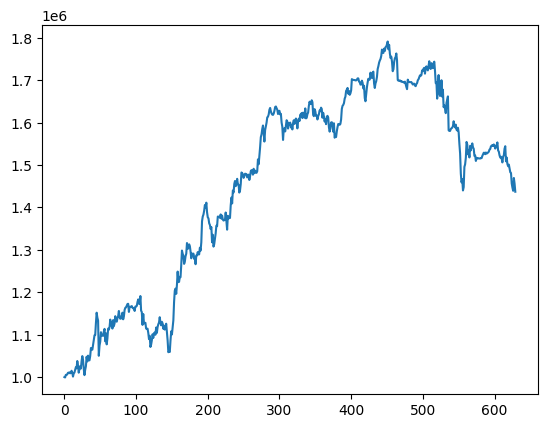

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

In [ ]:
df_a2c_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date),rebalance_window):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format('A2C',i))
    df_a2c_value = df_a2c_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_a2c_value.account_value.pct_change(1).mean()/df_a2c_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_a2c_value=df_a2c_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.39748700552466004


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

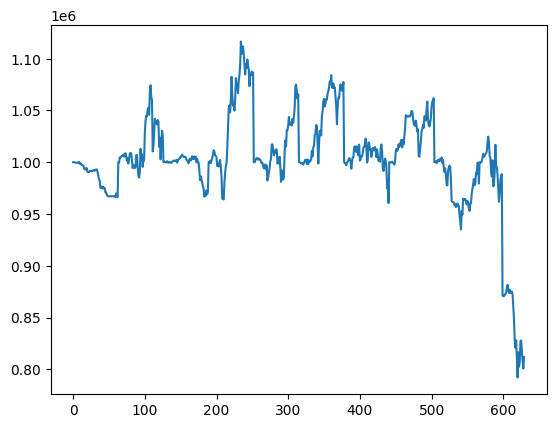

In [ ]:
%matplotlib inline
df_a2c_value.account_value.plot()

In [ ]:
df_ppo_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date),rebalance_window):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format('PPO',i))
    df_ppo_value = df_ppo_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_a2c_value.account_value.pct_change(1).mean()/df_a2c_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_ppo_value=df_ppo_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.39748700552466004


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

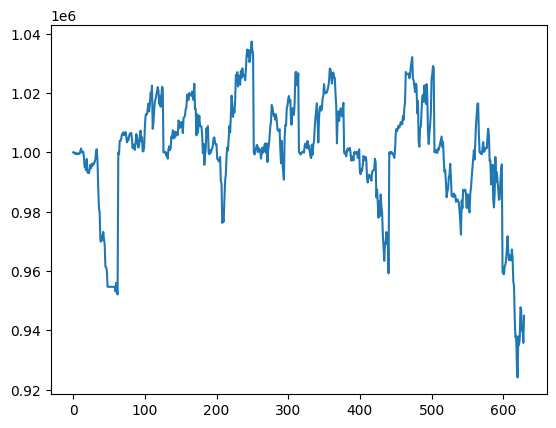

In [ ]:
%matplotlib inline
df_ppo_value.account_value.plot()

In [ ]:
df_ddpg_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date),rebalance_window):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format('DDPG',i))
    df_ddpg_value = df_ddpg_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_ddpg_value.account_value.pct_change(1).mean()/df_ddpg_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_ddpg_value=df_ddpg_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.14931551667280282


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

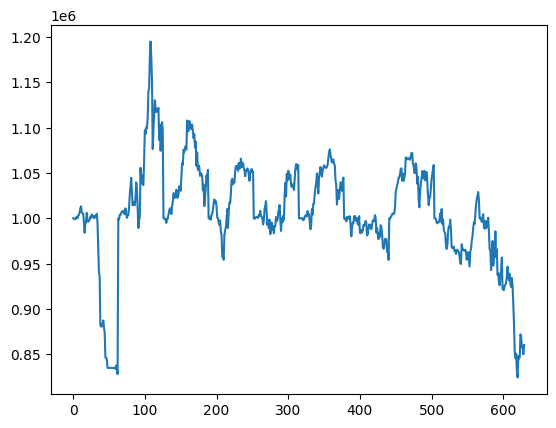

In [ ]:
%matplotlib inline
df_ddpg_value.account_value.plot()

In [ ]:
#BackTestStats
print("==============Get Backtest Results===========")
print("======================Ensemble=======================")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
======================Ensemble=======================
Annual return          0.156082
Cumulative returns     0.437049
Annual volatility      0.163312
Sharpe ratio           0.971670
Calmar ratio           0.789230
Stability              0.690177
Max drawdown          -0.197765
Omega ratio            1.189066
Sortino ratio          1.362922
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052367
Daily value at risk   -0.019946
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("==============Get Backtest Results===========")
print("======================A2C=======================")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_a2c_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
======================A2C=======================
Annual return         -0.079978
Cumulative returns    -0.188114
Annual volatility      0.171864
Sharpe ratio          -0.397487
Calmar ratio          -0.275162
Stability              0.084515
Max drawdown          -0.290659
Omega ratio            0.909869
Sortino ratio         -0.475254
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.941429
Daily value at risk   -0.021924
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("==============Get Backtest Results===========")
print("======================PPO=======================")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_ppo_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
======================PPO=======================
Annual return         -0.022427
Cumulative returns    -0.055127
Annual volatility      0.083967
Sharpe ratio          -0.228712
Calmar ratio          -0.205342
Stability              0.042183
Max drawdown          -0.109217
Omega ratio            0.949857
Sortino ratio         -0.316013
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.768681
Daily value at risk   -0.010655
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("==============Get Backtest Results===========")
print("======================DDPG=======================")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_ddpg_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
======================DDPG=======================
Annual return         -0.058501
Cumulative returns    -0.139898
Annual volatility      0.231100
Sharpe ratio          -0.149316
Calmar ratio          -0.188474
Stability              0.041516
Max drawdown          -0.310392
Omega ratio            0.965616
Sortino ratio         -0.225329
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.780244
Daily value at risk   -0.029253
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
df_sp500_ = get_baseline(
        ticker="^GSPC",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_sp500_, value_col_name = 'close')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (629, 8)
Annual return          0.157520
Cumulative returns     0.440686
Annual volatility      0.197045
Sharpe ratio           0.842326
Calmar ratio           0.653544
Stability              0.542290
Max drawdown          -0.241025
Omega ratio            1.155100
Sortino ratio          1.189602
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.934728
Daily value at risk   -0.024167
dtype: float64


In [ ]:
df_sp500 = pd.DataFrame()
df_sp500['date'] = df_account_value['date']
df_sp500['sp500'] = df_sp500_['close'] / df_sp500_['close'][0] * env_kwargs["initial_amount"]
print("df_sp500: ", df_sp500)
df_sp500.to_csv("df_sp500.csv")
df_sp500 = df_sp500.set_index(df_sp500.columns[0])
print("df_sp500: ", df_sp500)
df_sp500.to_csv("df_sp500+.csv")

df_account_value.to_csv('df_account_value.csv')


df_sp500:             date         sp500
0    2020-04-02  1.000000e+06
1    2020-04-03  9.848629e+05
2    2020-04-06  1.054130e+06
3    2020-04-07  1.052440e+06
4    2020-04-08  1.088282e+06
..          ...           ...
625  2022-09-26  1.446452e+06
626  2022-09-27  1.443385e+06
627  2022-09-28  1.471780e+06
628  2022-09-29  1.440686e+06
629  2022-09-30           NaN

[630 rows x 2 columns]
df_sp500:                     sp500
date                    
2020-04-02  1.000000e+06
2020-04-03  9.848629e+05
2020-04-06  1.054130e+06
2020-04-07  1.052440e+06
2020-04-08  1.088282e+06
...                  ...
2022-09-26  1.446452e+06
2022-09-27  1.443385e+06
2022-09-28  1.471780e+06
2022-09-29  1.440686e+06
2022-09-30           NaN

[630 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_result_a2c.columns:  Index(['a2c'], dtype='object')
df_result_ppo.columns:  Index(['ppo'], dtype='object')
df_result_ddpg.columns:  Index(['ddpg'], dtype='object')
df_trade_date:        datadate
0   2020-01-02
1   2020-01-03
2   2020-01-06
3   2020-01-07
4   2020-01-08
..         ...
751 2022-12-23
752 2022-12-27
753 2022-12-28
754 2022-12-29
755 2022-12-30

[756 rows x 1 columns]
df_result_ensemble:                  ensemble
date                    
2020-04-02  1.000000e+06
2020-04-03  9.991142e+05
2020-04-06  1.005238e+06
2020-04-07  1.005143e+06
2020-04-08  1.006486e+06
...                  ...
2022-09-26  1.446749e+06
2022-09-27  1.439306e+06
2022-09-28  1.469445e+06
2022-09-29  1.455930e+06
2022-09-30  1.437049e+06

[630 rows x 1 columns]
df_result_a2c:                         a2c
date                      
2020-01-02  1000000.000000
2020-01-03   999913.002554
2020-01-06   999911.777282
2020-01-07   999724.217114


<Figure size 2000x1000 with 0 Axes>

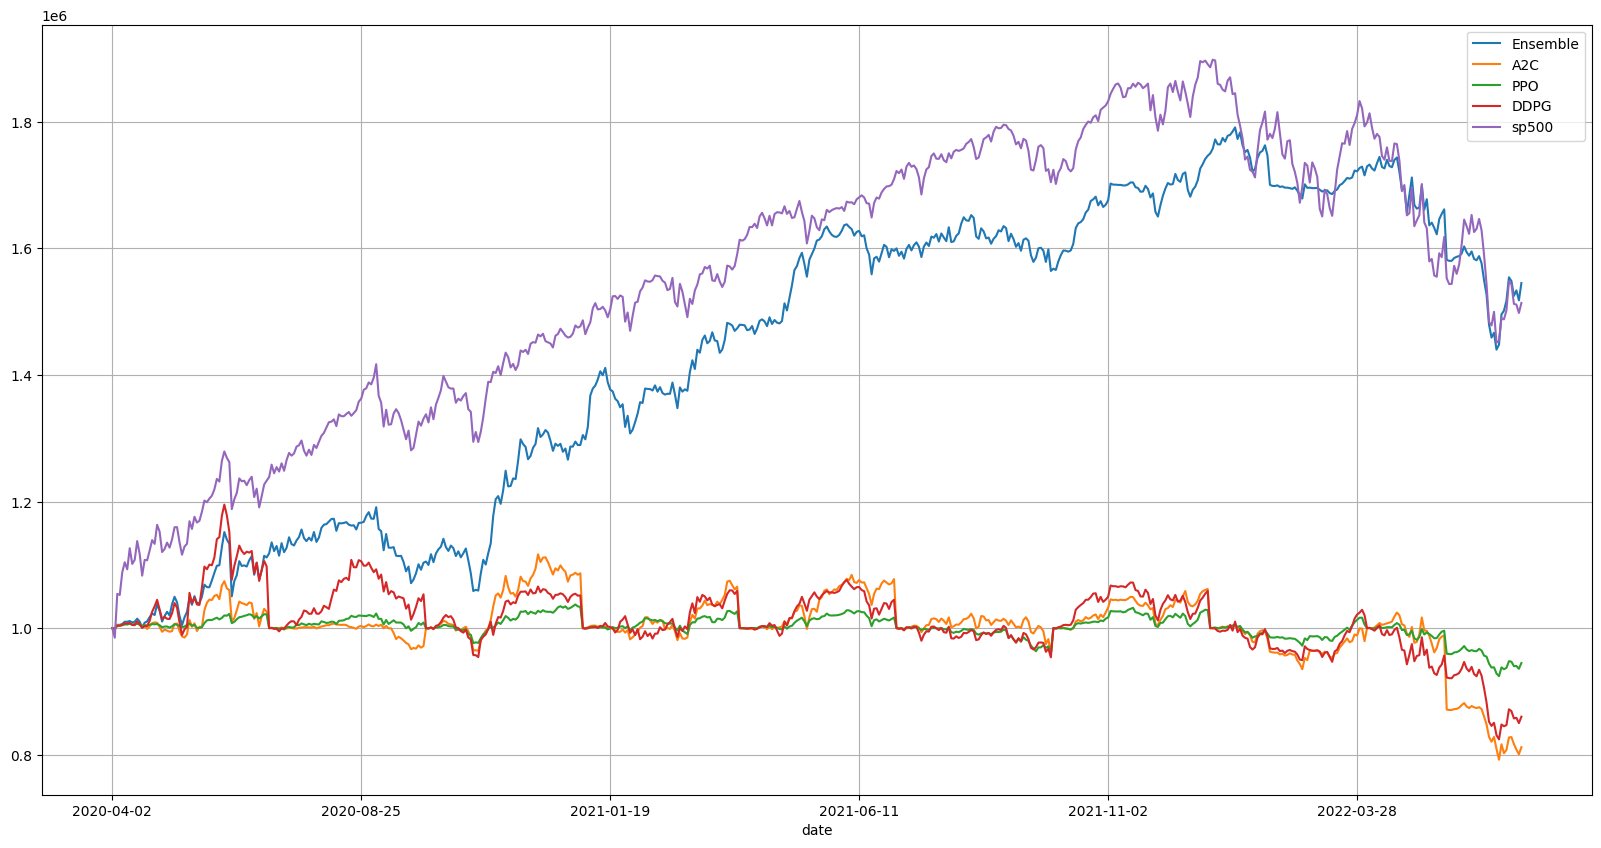

In [ ]:
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

df_result_a2c = pd.DataFrame({'date': df_a2c_value['date'], 'a2c': df_a2c_value['account_value']})
df_result_a2c = df_result_a2c.set_index('date')

df_result_ppo = pd.DataFrame({'date': df_ppo_value['date'], 'ppo': df_ppo_value['account_value']})
df_result_ppo = df_result_ppo.set_index('date')

df_result_ddpg = pd.DataFrame({'date': df_ddpg_value['date'], 'ddpg': df_ddpg_value['account_value']})
df_result_ddpg = df_result_ddpg.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)
print("df_result_a2c.columns: ", df_result_a2c.columns)
print("df_result_ppo.columns: ", df_result_ppo.columns)
print("df_result_ddpg.columns: ", df_result_ddpg.columns)

print("df_trade_date: ", df_trade_date)
df_result_ensemble.to_csv("df_result_ensemble.csv")
df_result_a2c.to_csv("df_result_a2c.csv")
df_result_ppo.to_csv("df_result_ppo.csv")
df_result_ddpg.to_csv("df_result_ddpg.csv")

print("df_result_ensemble: ", df_result_ensemble)
print("df_result_a2c: ", df_result_a2c)
print("df_result_ppo: ", df_result_ppo)
print("df_result_ddpg: ", df_result_ddpg)
print("==============Compare to S&P500===========")
result = pd.DataFrame()
result = pd.merge(df_result_ensemble, df_result_a2c, left_index=True, right_index=True)
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True)
result = pd.merge(result, df_result_ddpg, left_index=True, right_index=True)
result = pd.merge(result, df_sp500, left_index=True, right_index=True)

print("result: ", result)
result.to_csv("result.csv")
result.columns = ['Ensemble','A2C','PPO','DDPG', 'sp500']

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.figure();

ax = result.plot()
ax.grid(True)

plt.show()